# Toronto Dwellings Analysis Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions to create a Panel dashboard.

In [104]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [105]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [106]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [107]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

### Global available data

In [108]:
# Getting the data from the top 10 expensive neighbourhoods
top_10 = to_data.groupby('neighbourhood').mean().reset_index().sort_values('average_house_value', ascending=False).reset_index().drop(columns=['index'])
top_10 = top_10[:10]
top_10_expensive_neighbourhoods = top_10[['neighbourhood', 'average_house_value']]

# Calculate the mean number of dwelling types units per year
mean_dwelling_types_ = to_data.groupby('year').mean()[['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]
mean_dwelling_types_.reset_index()

# Calculate the average monthly shelter costs for owned and rented dwellings
shelter_costs = to_data.groupby('year').mean()[['shelter_costs_owned', 'shelter_costs_rented']].reset_index()


#--------------------------------------------------------------------#


##Calculations for each chart?

#sorted data and set varibales from rental_anaysis
#neighbourhood map df
#grabbing ave values sorted by neighbourhood then combining it with locations dropping duplicated columns
values_neighbourhood = to_data[['neighbourhood', 'average_house_value']]
values_neighbourhood.reset_index().groupby('neighbourhood')

ave_neighbourhood_values = values_neighbourhood.groupby('neighbourhood').mean()
ave_neighbourhood_values = ave_neighbourhood_values.reset_index()
    
#combined_location_values = pd.concat([df_neighbourhood_locations, ave_neighbourhood_values], axis=1)
#combined_location_values = combined_location_values.loc[:,~combined_location_values.columns.duplicated()]

#bar chart calculations 
#sum of dwellings df 
num_dwel_per_yr = to_data.groupby('year').sum()
num_dwel_per_yr = num_dwel_per_yr[['single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]


#average house value df 
#average_house_value is already an average 
values_neighbourhood = to_data[['neighbourhood', 'average_house_value']]
values_neighbourhood.reset_index().groupby('neighbourhood')

#ave house value per year df
ave_house_value_yr = to_data['average_house_value'].groupby('year').mean()

#number dwelling types, just grabbing dwelling type columns
dwelling_types = to_data[['neighbourhood', 'single_detached_house', 'apartment_five_storeys_plus', 'movable_dwelling', 'semi_detached_house', 'row_house', 'duplex', 'apartment_five_storeys_less', 'other_house']]



### Panel Visualization Functions

In [193]:
# Define Panel visualization functions
def neighbourhood_map(): 
    """Neighbourhood Map"""
    combined_location_values = pd.concat([df_neighbourhood_locations, ave_neighbourhood_values], axis=1)
    combined_location_values = combined_location_values.loc[:,~combined_location_values.columns.duplicated()]
    map_plot = px.scatter_mapbox(combined_location_values, lat='lat', lon='lon', color='neighbourhood', size='average_house_value', zoom=4)
    return map_plot



def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    fig = data.hvplot.bar(title=title, xlabel=xlabel, ylabel=ylabel, rot=90, height=400, width=500, color=color)
    return fig
#
    
    
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    chart = data.hvplot.line(title = title, x=xlabel, y=ylabel, xlabel=xlabel, ylabel=ylabel, color=color)
    return chart
    #
    
def average_house_value():
    """Average house values per year."""
    ave_house_value_plot = ave_house_value_yr.hvplot.line(title='Average House Value in Toronto')
    return ave_house_value_plot
    
    
    
def average_value_by_neighbourhood():
    """Average house values by neighbourhood."""
    plot = values_neighbourhood.hvplot.line(
    "year",
    "average_house_value",
    xlabel="year",
    ylabel="average_house_value",
    groupby="neighbourhood")
    return plot
    #
    
def number_dwelling_types():
    """Number of dwelling types per year"""
    
    num_types = dwelling_types.hvplot.bar(
    "year",
    xlabel="year",
    ylabel="number of dwelling types",
    groupby="neighbourhood",
    rot=90)
    return num_types
#
    
def average_house_value_snapshot():
    """Average house value for all Toronto's neighbourhoods per year."""

    # I would plot a bar chart for average house value by neighbourhood, then do a groupby="year"=
    ave_house_val = ave_house_value_yr.reset_index()
    return ave_house_val
    
    
def top_most_expensive_neighbourhoods():
    """Top 10 most expensive neighbourhoods."""
    
    plot = top_10_expensive_neighbourhoods.hvplot.bar(
    'neighbourhood',
    title='Most Expensive Neighbourhoods by House Value',
    xlabel="Neighbourhoods",
    ylabel="Average House Value(Price)",
    rot=30,
    color='green')
    return plot
    
    
def sunburts_cost_analysis():
    """Sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year."""
    
    # NA
    
    

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [195]:
# Create a Title for the Dashboard
title = pn.Column(
    '#Real Estate Investment Analysis Dashboard',
    '##Toronto Canada'
)

# Define a welcome text
welcome = pn.Column(
    '*Welcome, this dashboard contains: *'
)

# Create a tab layout for the dashboard
#num_dwel_per_yr tabs
tabs = pn.Tabs(
    ('2001',create_bar_chart(num_dwel_per_yr.loc[2001], 'Dwelling types in Toronto in 2001', '2001', 'dwelling type units', 'red')),
    ('2006',create_bar_chart(num_dwel_per_yr.loc[2006], 'Dwelling types in Toronto in 2006', '2006', 'dwelling type units', 'blue')),
    ('2011',create_bar_chart(num_dwel_per_yr.loc[2011], 'Dwelling types in Toronto in 2011', '2011', 'dwelling type units', 'orange')),
    ('2016', create_bar_chart(num_dwel_per_yr.loc[2016], 'Dwelling types in Toronto in 2016', '2016', 'dwelling type units', 'pink'))
)

#line chart of ave monthly shelter costs
line_chart_rows = pn.Tabs(
    ('Owned Dwellings', create_line_chart(shelter_costs, title="Average Monthly Shelter Cost for Owned Dwellings in Toronto", xlabel='year', ylabel='shelter_costs_owned', color='green')),
    ('Rented Dwellings', create_line_chart(shelter_costs, title="Average Monthly Shelter Cost for Rented Dwellings in Toronto", xlabel='year', ylabel='shelter_costs_rented', color='orange'))
)

# Create the main dashboard:
dashboard = pn.Column(
    title,
    welcome,    
    '##Number of Dwelling Types Per Year',
    tabs,
    '##Average Monthly Shelter Cost for Owned Dwellings in Toronto',
    line_chart_rows,
    average_house_value(), 
    '##Neighbourhood Average Value and Number of Dwellings',
    average_value_by_neighbourhood(),
    number_dwelling_types(),
    top_most_expensive_neighbourhoods(),
    '##Average for each year',
    average_house_value_snapshot(),
    '##Average House Value By Neighbourhood',
    neighbourhood_map()
)

## Serve the Panel Dashboard

In [196]:
dashboard.servable()

Column
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
    [1] Column
        [0] Markdown(str)
    [2] Markdown(str)
    [3] Tabs
        [0] HoloViews(Bars, name='2001')
        [1] HoloViews(Bars, name='2006')
        [2] HoloViews(Bars, name='2011')
        [3] HoloViews(Bars, name='2016')
    [4] Markdown(str)
    [5] Tabs
        [0] HoloViews(Curve, name='Owned Dwellings')
        [1] HoloViews(Curve, name='Rented Dwellings')
    [6] HoloViews(Curve)
    [7] Markdown(str)
    [8] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
            [1] VSpacer()
    [9] Row
        [0] HoloViews(DynamicMap)
        [1] Column
            [0] WidgetBox
                [0] Select(margin=(20, 20, 20, 20), name='neighbourhood', options=['Agincourt North', ...], value='Agincourt North', width=250)
            [1] VSpacer()
    [10] HoloViews(Bars)
    [11] Markdown(str)
    [12] DataFrame(DataFrame)
    [13] Markdown(str)
    [14] Plotly(Figure)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

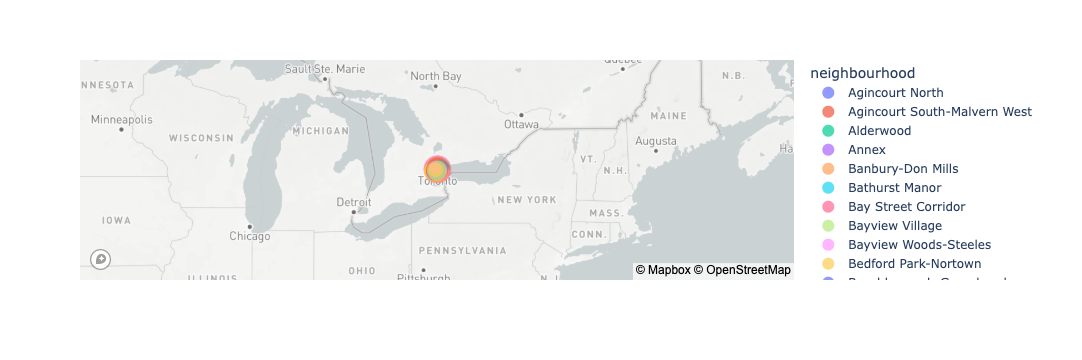

In [113]:
neighbourhood_map().show()

In [97]:
# create_bar_chart(data, title, xlabel, ylabel, color)

# # Bar chart for 2001
#create_bar_chart(num_dwel_per_yr.loc[2001], "Dwelling Types in Toronto in 2001", "2001", "Dwelling Type Units", "red")

# # Bar chart for 2006
# create_bar_chart(df_dwelling_units.loc[2006], "Dwelling Types in Toronto in 2006", "2006", "Dwelling Type Units", "blue")

# # Bar chart for 2011
# create_bar_chart(df_dwelling_units.loc[2011], "Dwelling Types in Toronto in 2011", "2011", "Dwelling Type Units", "orange")

# # Bar chart for 2016
# create_bar_chart(df_dwelling_units.loc[2016], "Dwelling Types in Toronto in 2016", "2016", "Dwelling Type Units", "magenta")

In [90]:
# create_line_chart(data, title, xlabel, ylabel, color)

# # Line chart for owned dwellings
# create_line_chart(df_avg_costs["shelter_costs_owned"], "Average Monthly Shelter Cost for Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "blue")

# # Line chart for rented dwellings
# create_line_chart(df_avg_costs["shelter_costs_rented"], "Average Monthly Shelter Cost for Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Costs", "orange")

In [98]:
#average_house_value()

In [92]:
# average_value_by_neighbourhood()

In [99]:
#number_dwelling_types()

In [ ]:
# average_house_value_snapshot()

In [100]:
#top_most_expensive_neighbourhoods()

In [ ]:
# sunburts_cost_analysis()